1. python을 활용하여 구구단 (기본 문법)
2. Python 기본 문법을 사용한 방법, <br>
   numpy를 사용한 방법, <br>
   numba.jit을 사용한 방법, <br>
   cuda를 사용한 방법 넷을 전부 활용하여 결과를 비교하시오.

In [115]:
import numpy as np
from numba import jit
from numba import cuda
import pprint
import time
import matplotlib.pyplot as plt
%matplotlib inline

# 일반 파이썬 버전 구구단

In [234]:

a=[[0 for i in range(10)]for j in range(10)]
def gugudan_basic(x,y):
    for i in range(x,y+1):
        for j in range(x,y+1):
            a[j][i]=(j+1)*(i+1)
            a[j][i]=float(a[j][i])
    return a


        

In [251]:
t1=time.time()
pprint.pprint(gugudan_basic(0,9))
t2=time.time()
basic_time=t2-t1
print(basic_time)

[[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0],
 [2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0],
 [3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0, 27.0, 30.0],
 [4.0, 8.0, 12.0, 16.0, 20.0, 24.0, 28.0, 32.0, 36.0, 40.0],
 [5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0, 45.0, 50.0],
 [6.0, 12.0, 18.0, 24.0, 30.0, 36.0, 42.0, 48.0, 54.0, 60.0],
 [7.0, 14.0, 21.0, 28.0, 35.0, 42.0, 49.0, 56.0, 63.0, 70.0],
 [8.0, 16.0, 24.0, 32.0, 40.0, 48.0, 56.0, 64.0, 72.0, 80.0],
 [9.0, 18.0, 27.0, 36.0, 45.0, 54.0, 63.0, 72.0, 81.0, 90.0],
 [10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0]]
0.001987934112548828


# Numpy

In [236]:
a_numpy_list=np.ones(100).reshape(10,10)

def gugudan_numpy(x,y):
    for i in range(x,y+1):
        for j in range(x,y+1):
            a_numpy_list[j][i]=(j+1)*(i+1)
            
    return a_numpy_list



In [255]:
t1_numpy=time.time()

print(gugudan_numpy(0,9))
t2_numpy=time.time()
time_numpy=t2_numpy-t1_numpy
print(time_numpy)

[[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
 [  2.   4.   6.   8.  10.  12.  14.  16.  18.  20.]
 [  3.   6.   9.  12.  15.  18.  21.  24.  27.  30.]
 [  4.   8.  12.  16.  20.  24.  28.  32.  36.  40.]
 [  5.  10.  15.  20.  25.  30.  35.  40.  45.  50.]
 [  6.  12.  18.  24.  30.  36.  42.  48.  54.  60.]
 [  7.  14.  21.  28.  35.  42.  49.  56.  63.  70.]
 [  8.  16.  24.  32.  40.  48.  56.  64.  72.  80.]
 [  9.  18.  27.  36.  45.  54.  63.  72.  81.  90.]
 [ 10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]]
0.003972530364990234


# Numba

In [195]:

a_numba=[[0 for i in range(10)]for j in range(10)]

@jit()
def gugudan_basic_numba(x,y):
    for i in range(x,y+1):
        for j in range(x,y+1):
            a_numba[j][i]=(j+1)*(i+1)
    return a_numba



In [219]:
t1_numba=time.time()

pprint.pprint(gugudan_basic_numba(1,9))

t2_numba=time.time()

time_numba=t2_numba- t1_numba
print(time_numba)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 4, 6, 8, 10, 12, 14, 16, 18, 20],
 [0, 6, 9, 12, 15, 18, 21, 24, 27, 30],
 [0, 8, 12, 16, 20, 24, 28, 32, 36, 40],
 [0, 10, 15, 20, 25, 30, 35, 40, 45, 50],
 [0, 12, 18, 24, 30, 36, 42, 48, 54, 60],
 [0, 14, 21, 28, 35, 42, 49, 56, 63, 70],
 [0, 16, 24, 32, 40, 48, 56, 64, 72, 80],
 [0, 18, 27, 36, 45, 54, 63, 72, 81, 90],
 [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]]
0.0009953975677490234


# CUDA

In [212]:
a_cuda=[[0 for i in range(10)]for j in range(10)]

@jit()
def gugudan_basic_cuda(x,y):
    for i in range(x,y+1):
        for j in range(x,y+1):
            a_cuda[j][i]=(j+1)*(i+1)
    return a_cuda


In [218]:
t1_cuda=time.time()

pprint.pprint(gugudan_basic_cuda(1,9))
t2_cuda=time.time()
time_cuda=t2_cuda - t1_cuda

print(time_cuda)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 4, 6, 8, 10, 12, 14, 16, 18, 20],
 [0, 6, 9, 12, 15, 18, 21, 24, 27, 30],
 [0, 8, 12, 16, 20, 24, 28, 32, 36, 40],
 [0, 10, 15, 20, 25, 30, 35, 40, 45, 50],
 [0, 12, 18, 24, 30, 36, 42, 48, 54, 60],
 [0, 14, 21, 28, 35, 42, 49, 56, 63, 70],
 [0, 16, 24, 32, 40, 48, 56, 64, 72, 80],
 [0, 18, 27, 36, 45, 54, 63, 72, 81, 90],
 [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]]
0.0009949207305908203


# 시간 비교



In [286]:
print("일반  :" ,basic_time)
print("numpy :" , time_numpy)
print("numba :" , time_numba)
print("cuda  :", time_cuda)


일반  : 0.001987934112548828
numpy : 0.003972530364990234
numba : 0.0009953975677490234
cuda  : 0.0009949207305908203


In [301]:
import pandas as pd
a=[basic_time,time_numpy,time_numba,time_cuda]
a.sort()

df=pd.DataFrame(data=a ,index=["cuda","numba","basic","numpy"])
df.head()

,0
cuda,0.000995
numba,0.000995
basic,0.001988
numpy,0.003973


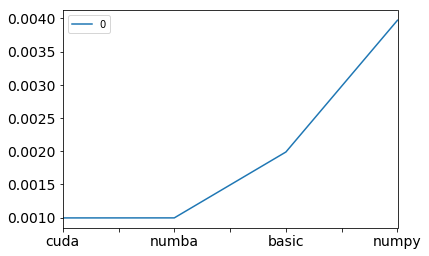

In [302]:
df.plot(kind='line',fontsize=14)